In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gseapy as gp

In [3]:
degs = pd.read_csv("/mnt/c/Users/ouyangkang/Downloads/tmp_UP_DOWN_cancer.csv")

In [4]:
degs.head(5)

,Unnamed: 0,names,scores,pvals,pvals_adj,logfoldchanges
0,0,RBFOX1,8.756469,2.014634e-18,2.922830e-14,5.050808
1,1,KCTD8,8.640001,5.621254e-18,4.077658e-14,6.760842
2,2,MAST4,8.500508,1.887629e-17,9.128574e-14,4.739602
3,3,PRG4,8.225538,1.943167e-16,7.047867e-13,8.940576
4,4,ZFPM2,7.951907,1.836626e-15,4.820924e-12,5.435618


In [5]:
up_degs = degs[degs["logfoldchanges"] > 0]
print(up_degs.shape)

down_degs = degs[degs["logfoldchanges"] < 0]
print(down_degs.shape)

(852, 6)
(120, 6)


In [30]:
up_degs

,Unnamed: 0,names,scores,pvals,pvals_adj,logfoldchanges
0,0,RBFOX1,8.756469,2.014634e-18,2.922830e-14,5.050808
1,1,KCTD8,8.640001,5.621254e-18,4.077658e-14,6.760842
2,2,MAST4,8.500508,1.887629e-17,9.128574e-14,4.739602
3,3,PRG4,8.225538,1.943167e-16,7.047867e-13,8.940576
4,4,ZFPM2,7.951907,1.836626e-15,4.820924e-12,5.435618
...,...,...,...,...,...,...
847,847,UBAP2,1.964415,4.948193e-02,7.410150e-01,1.515973
848,848,HELLS,1.964148,4.951296e-02,7.410150e-01,1.524939
849,849,JOSD1,1.963880,4.954401e-02,7.410150e-01,2.538828
850,850,ST6GALNAC5,1.961470,4.982418e-02,7.444380e-01,3.569487


In [31]:
enr_up = gp.enrichr(up_degs["names"][:100],
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [32]:
# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

In [33]:
enr_up.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,regulation of cell migration,14/408,1.554975e-08,0.000015,0,0,8.059379,144.901358,NTNG1;CARMIL1;CEMIP;CLIC4;SEMA3C;SULF1;EGFR;PT...
1,GO_Biological_Process_2021,regulation of cellular response to growth fact...,4/17,1.331900e-06,0.000657,0,0,63.740385,862.337567,DOK5;SLIT2;SULF1;FSTL1
2,GO_Biological_Process_2021,positive regulation of cell projection organiz...,7/117,1.998947e-06,0.000658,0,0,13.541544,177.704202,CARMIL1;GRIP1;TENM3;DPYSL3;ROR1;ROR2;SLIT2
3,GO_Biological_Process_2021,axonogenesis,9/240,3.271917e-06,0.000807,0,0,8.421150,106.360261,NTNG1;SEMA3C;DOK5;SLIT3;SLIT2;EFNA5;EZR;PTK2;S...
4,GO_Biological_Process_2021,axon guidance,8/203,8.213976e-06,0.001621,0,0,8.787068,102.893697,SEMA3C;DOK5;SLIT3;SLIT2;EFNA5;EZR;PTK2;SPTBN1
...,...,...,...,...,...,...,...,...,...,...
982,GO_Biological_Process_2021,cellular macromolecule biosynthetic process,1/314,7.953411e-01,0.798577,0,0,0.632104,0.144742,RBMS1
983,GO_Biological_Process_2021,transcription by RNA polymerase II,1/320,8.015008e-01,0.803944,0,0,0.620025,0.137192,MAF
984,GO_Biological_Process_2021,cellular protein localization,1/329,8.103979e-01,0.812043,0,0,0.602735,0.126713,EGFR
985,GO_Biological_Process_2021,protein transport,1/369,8.453966e-01,0.846254,0,0,0.536122,0.090041,SPTBN1


In [34]:
enr_up.res2d[enr_up.res2d["P-value"] < 0.05].to_csv("/mnt/c/Users/ouyangkang/Desktop/result_malignant.csv")

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


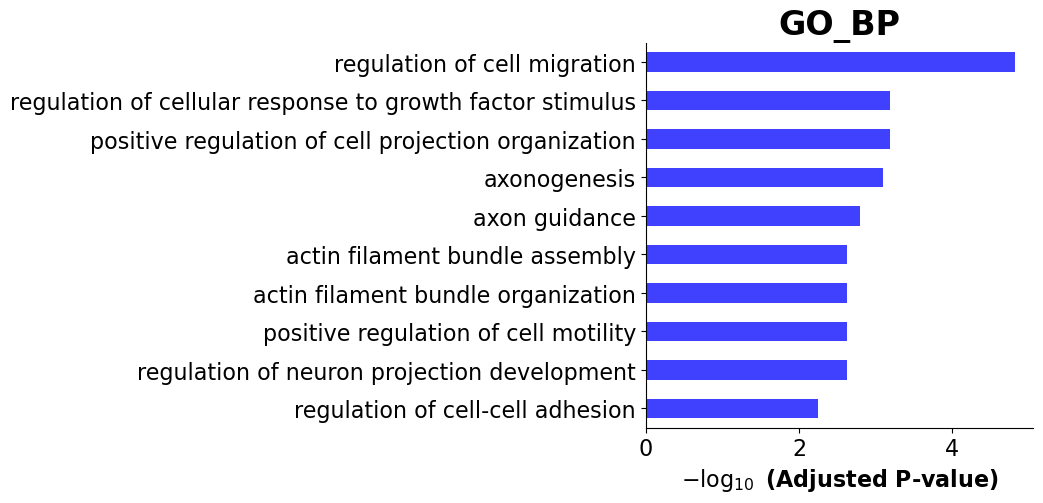

In [35]:
ax = gp.barplot(enr_up.res2d, figsize=(5,5),
                # group ='DW',
                title ="GO_BP",
                color = "blue")

In [26]:
enr_down = gp.enrichr(down_degs["names"][:100],
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [27]:
# trim (go:...)
enr_down.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


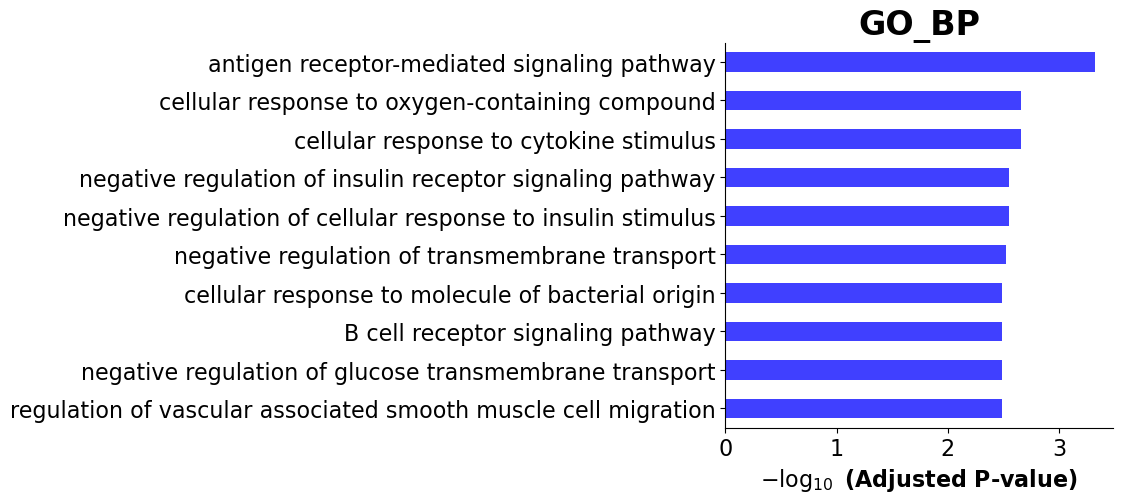

In [28]:
ax = gp.barplot(enr_down.res2d, figsize=(5,5),
                # group ='DW',
                title ="GO_BP",
                color = "blue")

In [29]:
enr_down.res2d.head(10).Term[9]

'regulation of vascular associated smooth muscle cell migration'

In [38]:
enr_down.res2d[enr_down.res2d["P-value"] < 0.05].to_csv("/mnt/c/Users/ouyangkang/Desktop/down_reg.csv", index=None)

In [39]:
enr_up.res2d['UP_DW'] = "UP"
enr_down.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d, enr_down.res2d])

In [47]:
enr_res.reset_index(inplace=True)

In [40]:
from gseapy.scipalette import SciPalette
sci = SciPalette()
NbDr = sci.create_colormap()

In [57]:
enr_res.loc[[0, 1, 10, 68, 89, 987+14, 987+23, 987+34, 987+42, 987+45]]

,index,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,UP_DW
0,0,GO_Biological_Process_2021,regulation of cell migration,14/408,1.554975e-08,0.000015,0,0,8.059379,144.901358,NTNG1;CARMIL1;CEMIP;CLIC4;SEMA3C;SULF1;EGFR;PT...,UP
1,1,GO_Biological_Process_2021,regulation of cellular response to growth fact...,4/17,1.331900e-06,0.000657,0,0,63.740385,862.337567,DOK5;SLIT2;SULF1;FSTL1,UP
10,10,GO_Biological_Process_2021,regulation of cell-cell adhesion,4/43,6.250942e-05,0.005609,0,0,21.219017,205.404186,MAGI1;TENM3;EFNA5;PTK2,UP
68,68,GO_Biological_Process_2021,positive regulation of cell cycle,3/66,4.418151e-03,0.061646,0,0,9.738341,52.801613,CCNYL1;MEIS2;EGFR,UP
89,89,GO_Biological_Process_2021,regulation of vascular endothelial growth fact...,2/27,8.008107e-03,0.085913,0,0,16.224490,78.320495,C3;SULF1,UP
1001,14,GO_Biological_Process_2021,B cell activation,5/85,6.751701e-05,0.005613,0,0,13.039474,125.219775,CD86;MEF2C;PRKCB;GPR183;PTPRJ,DOWN
1010,23,GO_Biological_Process_2021,T cell receptor signaling pathway,6/158,1.428876e-04,0.007537,0,0,8.292833,73.420201,RFTN1;PDE4B;TAB2;LCP2;PTPRJ;HLA-DQA1,DOWN
1021,34,GO_Biological_Process_2021,I-kappaB kinase/NF-kappaB signaling,4/62,2.627533e-04,0.009564,0,0,14.254310,117.516740,IRAK2;TAB2;TANK;TLR2,DOWN
1029,42,GO_Biological_Process_2021,regulation of myeloid cell differentiation,4/68,3.748983e-04,0.011107,0,0,12.914062,101.877177,MEF2C;NR4A3;PRKCB;THBS1,DOWN
1032,45,GO_Biological_Process_2021,positive regulation of leukocyte cell-cell adh...,3/31,4.924437e-04,0.013460,0,0,21.949926,167.173503,NFAT5;NR4A3;CD44,DOWN


In [60]:
enr_res.loc[[0, 1, 10, 68, 89, 987+14, 987+23, 987+34, 987+42, 987+45]]

,index,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,UP_DW
0,0,GO_Biological_Process_2021,regulation of cell migration,14/408,1.554975e-08,0.000015,0,0,8.059379,144.901358,NTNG1;CARMIL1;CEMIP;CLIC4;SEMA3C;SULF1;EGFR;PT...,UP
1,1,GO_Biological_Process_2021,regulation of cellular response to growth fact...,4/17,1.331900e-06,0.000657,0,0,63.740385,862.337567,DOK5;SLIT2;SULF1;FSTL1,UP
10,10,GO_Biological_Process_2021,regulation of cell-cell adhesion,4/43,6.250942e-05,0.005609,0,0,21.219017,205.404186,MAGI1;TENM3;EFNA5;PTK2,UP
68,68,GO_Biological_Process_2021,positive regulation of cell cycle,3/66,4.418151e-03,0.061646,0,0,9.738341,52.801613,CCNYL1;MEIS2;EGFR,UP
89,89,GO_Biological_Process_2021,regulation of vascular endothelial growth fact...,2/27,8.008107e-03,0.085913,0,0,16.224490,78.320495,C3;SULF1,UP
1001,14,GO_Biological_Process_2021,B cell activation,5/85,6.751701e-05,0.005613,0,0,13.039474,125.219775,CD86;MEF2C;PRKCB;GPR183;PTPRJ,DOWN
1010,23,GO_Biological_Process_2021,T cell receptor signaling pathway,6/158,1.428876e-04,0.007537,0,0,8.292833,73.420201,RFTN1;PDE4B;TAB2;LCP2;PTPRJ;HLA-DQA1,DOWN
1021,34,GO_Biological_Process_2021,I-kappaB kinase/NF-kappaB signaling,4/62,2.627533e-04,0.009564,0,0,14.254310,117.516740,IRAK2;TAB2;TANK;TLR2,DOWN
1029,42,GO_Biological_Process_2021,regulation of myeloid cell differentiation,4/68,3.748983e-04,0.011107,0,0,12.914062,101.877177,MEF2C;NR4A3;PRKCB;THBS1,DOWN
1032,45,GO_Biological_Process_2021,positive regulation of leukocyte cell-cell adh...,3/31,4.924437e-04,0.013460,0,0,21.949926,167.173503,NFAT5;NR4A3;CD44,DOWN


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


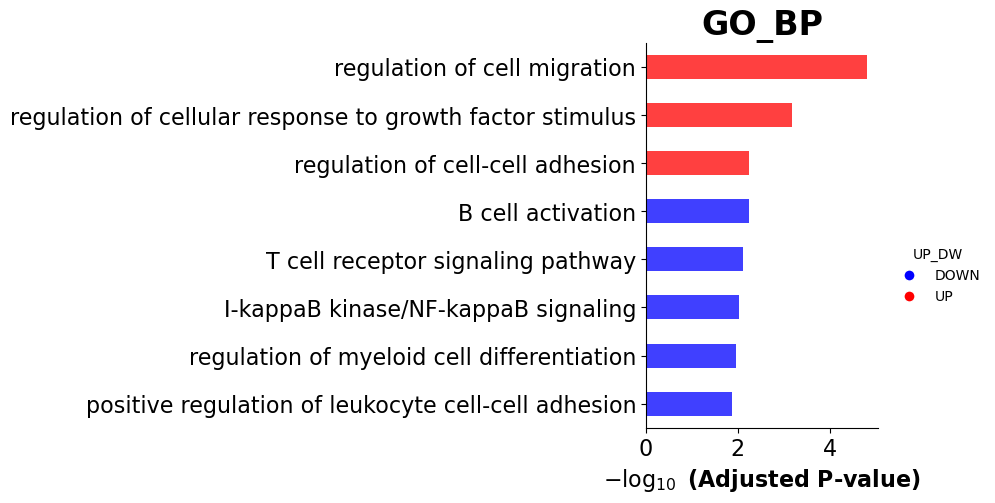

In [59]:
ax = gp.barplot(enr_res.loc[[0, 1, 10, 68, 89, 987+14, 987+23, 987+34, 987+42, 987+45]],
                figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'],
                cutoff=0.05,
                )